In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


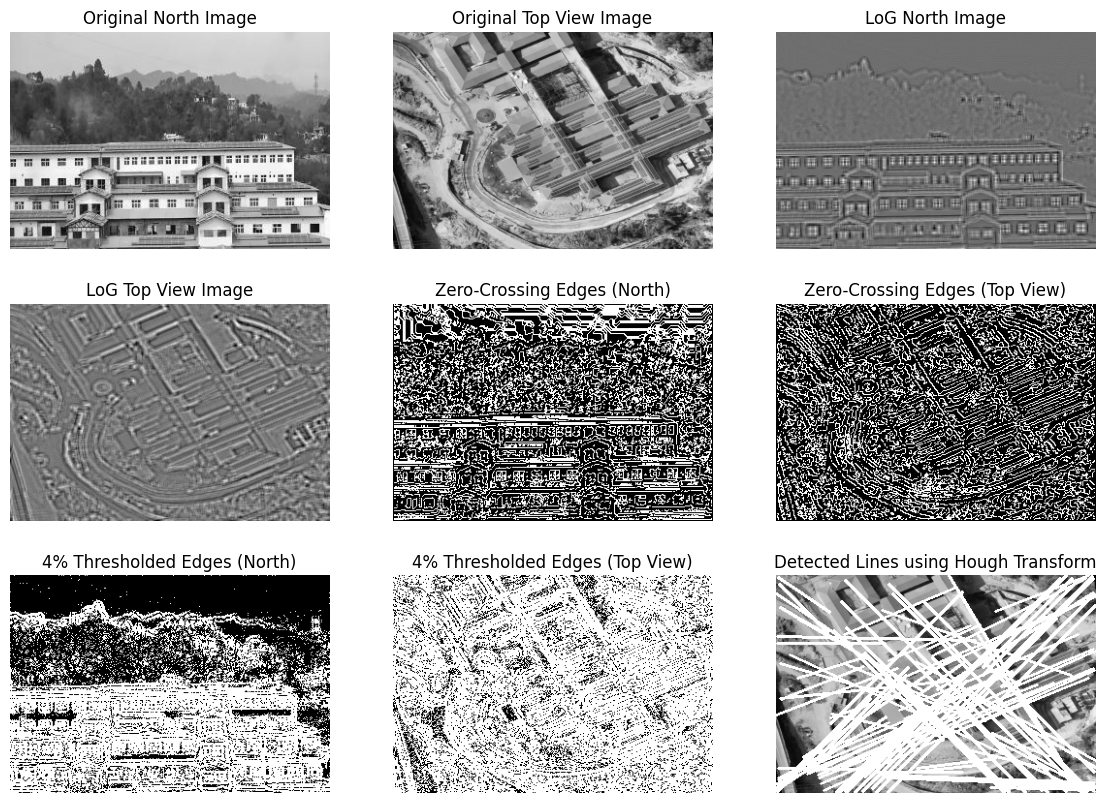

In [2]:
#Ans1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

# Load the images
north_image = cv2.imread('/content/drive/MyDrive/CV Assignment 2/Q.1/north(1).jpg', cv2.IMREAD_GRAYSCALE)
top_view_image = cv2.imread('/content/drive/MyDrive/CV Assignment 2/Q.1/Top view(1).png', cv2.IMREAD_GRAYSCALE)

# Helper function to apply Laplacian of Gaussian (LoG)
def laplacian_of_gaussian(image, sigma=2):
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), sigma)
    # Compute the Laplacian (second derivative)
    log_image = cv2.Laplacian(blurred_image, cv2.CV_64F)
    return log_image

# Helper function to detect zero crossings (edges)
def zero_crossing(log_image):
    zero_cross = np.zeros(log_image.shape)
    rows, cols = log_image.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Check for zero-crossing by comparing signs of neighbors
            if (log_image[i, j] > 0 and log_image[i+1, j] < 0) or (log_image[i, j] < 0 and log_image[i+1, j] > 0) or \
               (log_image[i, j] > 0 and log_image[i, j+1] < 0) or (log_image[i, j] < 0 and log_image[i, j+1] > 0):
                zero_cross[i, j] = 255
    return zero_cross

# Step 1: Apply Laplacian of Gaussian (LoG) to both images
log_north = laplacian_of_gaussian(north_image)
log_top_view = laplacian_of_gaussian(top_view_image)

# Step 2: Detect zero crossings to get edges
edges_north = zero_crossing(log_north)
edges_top_view = zero_crossing(log_top_view)

# Step 3: Apply 4% threshold to plot significant edges
# Compute 4% of the maximum gradient magnitude
threshold_north = 0.04 * np.max(log_north)
threshold_top_view = 0.04 * np.max(log_top_view)

_, thresholded_north = cv2.threshold(np.abs(log_north), threshold_north, 255, cv2.THRESH_BINARY)
_, thresholded_top_view = cv2.threshold(np.abs(log_top_view), threshold_top_view, 255, cv2.THRESH_BINARY)

# Step 4: Hough Transform for line detection on top_view
# First, Canny edge detection is applied to enhance line edges
canny_edges_top_view = cv2.Canny(top_view_image, 50, 150)

# Perform Hough Line Transformation to detect lines
lines = cv2.HoughLinesP(canny_edges_top_view, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

# Draw the detected lines on the top_view image
line_image = np.copy(top_view_image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), 255, 2)

# Plotting the results
plt.figure(figsize=(14, 10))

# Original north.jpg and top_view.png images
plt.subplot(3, 3, 1)
plt.imshow(north_image, cmap='gray')
plt.title('Original North Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(top_view_image, cmap='gray')
plt.title('Original Top View Image')
plt.axis('off')

# Laplacian of Gaussian (LoG) results
plt.subplot(3, 3, 3)
plt.imshow(log_north, cmap='gray')
plt.title('LoG North Image')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(log_top_view, cmap='gray')
plt.title('LoG Top View Image')
plt.axis('off')

# Zero-Crossings (Edge Detection)
plt.subplot(3, 3, 5)
plt.imshow(edges_north, cmap='gray')
plt.title('Zero-Crossing Edges (North)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(edges_top_view, cmap='gray')
plt.title('Zero-Crossing Edges (Top View)')
plt.axis('off')

# Thresholded edges (4%)
plt.subplot(3, 3, 7)
plt.imshow(thresholded_north, cmap='gray')
plt.title('4% Thresholded Edges (North)')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(thresholded_top_view, cmap='gray')
plt.title('4% Thresholded Edges (Top View)')
plt.axis('off')

# Hough Transform (Lines on top_view.png)
plt.subplot(3, 3, 9)
plt.imshow(line_image, cmap='gray')
plt.title('Detected Lines using Hough Transform')
plt.axis('off')

plt.show()

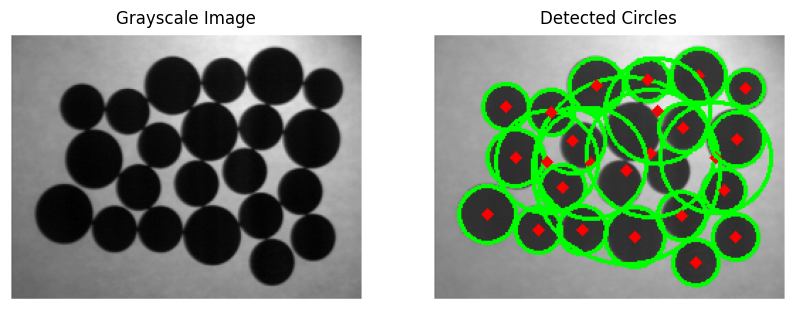

In [3]:
#Ans2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (coins.jpg/png')
image = cv2.imread('/content/drive/MyDrive/CV Assignment 2/Q.2/coins.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2)

# Step 2: Apply Hough Transform for circle detection
# Parameters for cv2.HoughCircles:
#   dp: Inverse ratio of accumulator resolution to image resolution (1.2 means accumulator has 1/1.2 resolution of image)
#   minDist: Minimum distance between the centers of the detected circles
#   param1: First method-specific parameter for the Canny edge detector (high threshold)
#   param2: Accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected.
#   minRadius, maxRadius: Minimum and maximum radius of the circles to detect.

circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                           param1=100, param2=30, minRadius=10, maxRadius=100)

# Step 3: If circles are detected, draw them on the original image
if circles is not None:
    # Convert the circle parameters to integers
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Step 4: Display the results
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display with matplotlib
plt.title('Detected Circles')
plt.axis('off')

plt.show()

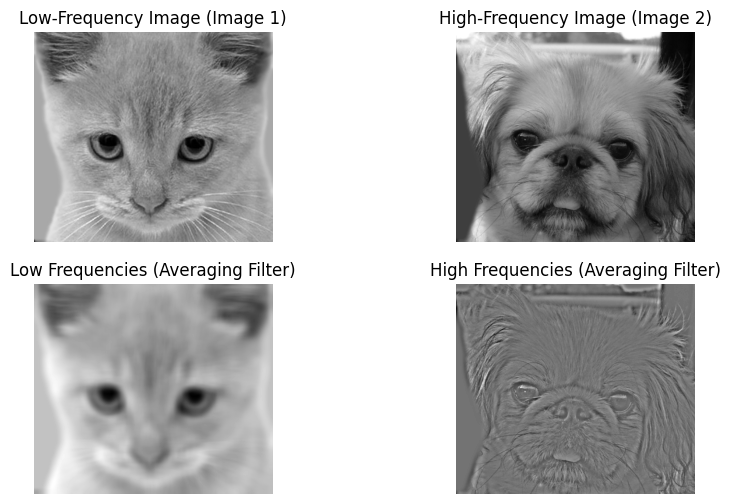

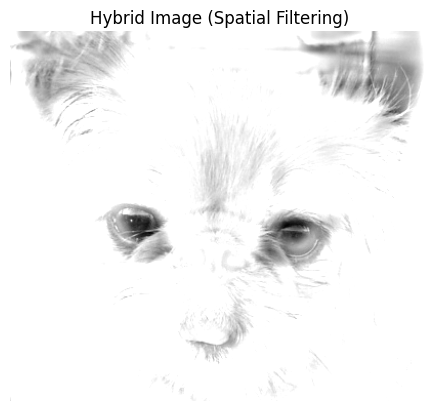

In [4]:
#Ans 3.a
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two grayscale images
image1 = cv2.imread('/content/drive/MyDrive/CV Assignment 2/Q.3/cat.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/drive/MyDrive/CV Assignment 2/Q.3/dog.jpg', cv2.IMREAD_GRAYSCALE)

# Ensure both images are the same size
if image1.shape != image2.shape:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Experiment with simple spatial filters
# Averaging filter (low-pass)
def apply_averaging_filter(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))

# Median filter (good for noise removal)
def apply_median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

# Laplacian filter (high-pass)
def apply_laplacian_filter(image):
    return cv2.Laplacian(image, cv2.CV_64F)

# Generate hybrid images using different filters
low_freq_image1 = apply_averaging_filter(image1, 15)  # Vary kernel size (15, 21, etc.)
high_freq_image2 = image2 - apply_averaging_filter(image2, 15)

# Create the hybrid image by combining low and high frequencies
hybrid_image = cv2.add(low_freq_image1, high_freq_image2 + 128)  # Add 128 for zero-mean adjustment

# Display the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Low-Frequency Image (Image 1)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('High-Frequency Image (Image 2)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(low_freq_image1, cmap='gray')
plt.title('Low Frequencies (Averaging Filter)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(high_freq_image2 + 128, cmap='gray')
plt.title('High Frequencies (Averaging Filter)')
plt.axis('off')

plt.figure()
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image (Spatial Filtering)')
plt.axis('off')

plt.show()

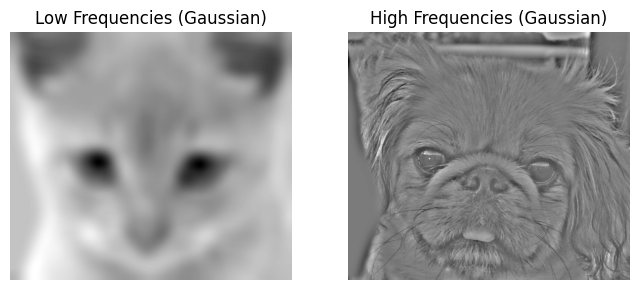

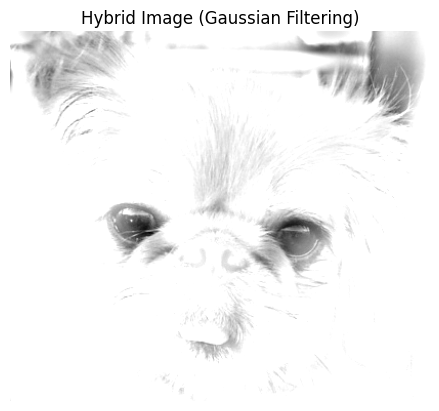

In [5]:
def apply_gaussian_filter(image, kernel_size=15, sigma=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

# Experiment with different sigma and kernel sizes
low_freq_image_gaussian = apply_gaussian_filter(image1, 31, 10)  # Large kernel and sigma
high_freq_image_gaussian = image2 - apply_gaussian_filter(image2, 31, 10)

# Create hybrid image
hybrid_image_gaussian = cv2.add(low_freq_image_gaussian, high_freq_image_gaussian + 128)

# Display results
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(low_freq_image_gaussian, cmap='gray')
plt.title('Low Frequencies (Gaussian)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_freq_image_gaussian + 128, cmap='gray')
plt.title('High Frequencies (Gaussian)')
plt.axis('off')

plt.figure()
plt.imshow(hybrid_image_gaussian, cmap='gray')
plt.title('Hybrid Image (Gaussian Filtering)')
plt.axis('off')

plt.show()